In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import datetime
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC



In [39]:

companies_pharma=["ABC","ABT","CAH","GSK","JNJ","LLY",
                "MCK","MRK","NVO","NVS","PFE","PRGO","RDY"]

companies=companies_pharma

dfs = {}
for company in companies:
    
    path=f'Prediction Bankruptcy Data/{company}_'

    df1=pd.read_csv(path+'annual_financials.csv')
    df2=pd.read_csv(path+'annual_balance-sheet.csv')
    df3=pd.read_csv(path+'annual_cash-flow.csv')
    
    for column in df1.columns[2:]:
        column1 = pd.to_datetime(column).date()
        new_column_name = column1.replace(month=12,day=31).strftime("%Y-%m-%d")
        df1 = df1.rename(columns={column: new_column_name})
    
    
    for columnn in df2.columns[1:]:
        column2 = pd.to_datetime(columnn).date()
        new_column_name = column2.replace(month=12,day=31).strftime("%Y-%m-%d")
        df2 = df2.rename(columns={columnn: new_column_name})
        
    for columnnn in df3.columns[2:]:
        column3 = pd.to_datetime(columnnn).date()
        new_column_name = column3.replace(month=12,day=31).strftime("%Y-%m-%d")
        df3 = df3.rename(columns={columnnn: new_column_name})
        
    # Drop duplicate columns
    df1 = df1.loc[:, ~df1.columns.duplicated()]
    df2 = df2.loc[:, ~df2.columns.duplicated()]
    df3 = df3.loc[:, ~df3.columns.duplicated()]

       
    df=pd.concat([df1,df2,df3],ignore_index=True)
    
    df.insert(0,"Company Name",company)
    
    if company in companies_pharma:
        df.insert(0,"Sector","Pharma")
    else:
        pass
    
    dfs[company] = df   
 
    
df = pd.concat(dfs.values())

df.drop(['ttm'], axis=1, inplace=True)

df
#df.to_csv('hulya.csv', index = False)

,Sector,Company Name,name,2019-12-31,2018-12-31,2017-12-31,2016-12-31,2015-12-31,2014-12-31,2013-12-31,...,1993-12-31,1992-12-31,1991-12-31,1990-12-31,1989-12-31,1988-12-31,1987-12-31,1986-12-31,1985-12-31,2020-12-31
0,Pharma,ABC,TotalRevenue,"179,589,121,000","167,939,635,000","153,143,826,000","146,849,686,000","135,961,803,000","119,569,127,000","87,959,167,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pharma,ABC,\tOperatingRevenue,"179,589,121,000","167,939,635,000","153,143,826,000","146,849,686,000","135,961,803,000","119,569,127,000","87,959,167,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pharma,ABC,CostOfRevenue,"174,450,809,000","163,327,318,000","148,597,824,000","142,577,080,000","132,432,490,000","116,586,761,000","85,451,348,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pharma,ABC,GrossProfit,"5,138,312,000","4,612,317,000","4,546,002,000","4,272,606,000","3,529,313,000","2,982,366,000","2,507,819,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pharma,ABC,OperatingExpense,"3,125,915,000","2,925,428,000","2,526,333,000","2,455,972,000","2,161,325,000","1,772,551,000","1,495,898,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Pharma,RDY,EndCashPosition,"2,228,000,000","2,542,000,000","3,779,000,000","4,921,000,000","5,394,000,000","8,451,000,000","5,054,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,962,000,000"
92,Pharma,RDY,FreeCashFlow,"21,213,000,000","6,986,000,000","-19,471,000,000","26,372,000,000","9,706,000,000","8,836,000,000","5,981,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"23,726,000,000"
93,Pharma,RDY,\tOperatingCashFlow,"28,704,000,000","18,029,000,000","21,513,000,000","41,247,000,000","25,033,000,000","19,463,000,000","13,317,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"29,841,000,000"
94,Pharma,RDY,\tCapitalExpenditure,"-7,491,000,000","-11,043,000,000","-40,984,000,000","-14,875,000,000","-15,327,000,000","-10,627,000,000","-7,336,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"-6,115,000,000"


In [40]:
df['name']=df['name'].str.replace('\t','')

df = df[df['Company Name'].isin(companies)]
columns=df.columns[3:]

for column in columns:
    df[column] = df[column].str.replace(',','').astype(float)
    
pd.set_option('display.float_format', '{:.2f}'.format)

df=df.drop(['Sector'],axis=1)
df = df.drop_duplicates(subset=['name', 'Company Name'])
df.rename(columns={col: pd.to_datetime(col).year for col in df.columns[2:]}, inplace=True)
df.drop(2020, axis=1, inplace=True)
df = df.drop_duplicates()
df = df[(df['name'].isin(['TotalRevenue','ChangeInWorkingCapital','TotalAssets','RetainedEarnings','Ebitda','TotalLiabilitiesNetMinorityInterest','MarketCap','PretaxIncome','StockholdersEquity'])) ]

df 

,Company Name,name,2019,2018,2017,2016,2015,2014,2013,2012,...,1994,1993,1992,1991,1990,1989,1988,1987,1986,1985
0,ABC,TotalRevenue,179589121000.00,167939635000.00,153143826000.00,146849686000.00,135961803000.00,119569127000.00,87959167000.00,79489596000.00,...,4301800000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,ABC,PretaxIncome,967106000.00,1177423000.00,917887000.00,1390910000.00,274149000.00,673428000.00,824458000.00,1163131000.00,...,-164600000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,ABC,TotalAssets,39171980000.00,37669838000.00,35316470000.00,33656200000.00,27736157000.00,21532183000.00,18918638000.00,15444126000.00,...,711600000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,ABC,TotalLiabilitiesNetMinorityInterest,36178774000.00,34619877000.00,33252009000.00,31526796000.00,27102637000.00,19575284000.00,16598893000.00,12987414000.00,...,1012300000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,ABC,StockholdersEquity,2878917000.00,2932824000.00,2064461000.00,2129404000.00,633520000.00,1956899000.00,2319745000.00,2456712000.00,...,-300700000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,RDY,TotalAssets,225427000000.00,225604000000.00,219821000000.00,207650000000.00,194762000000.00,170223000000.00,142369000000.00,119477000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,RDY,TotalLiabilitiesNetMinorityInterest,85230000000.00,99144000000.00,95777000000.00,79314000000.00,83460000000.00,79422000000.00,69264000000.00,62033000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,RDY,StockholdersEquity,140197000000.00,126460000000.00,124044000000.00,128336000000.00,111302000000.00,90801000000.00,73085000000.00,57444000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,RDY,RetainedEarnings,128646000000.00,113865000000.00,108224000000.00,99550000000.00,83643000000.00,65051000000.00,44815000000.00,31599000000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
dfs = []

for company in companies:
    start_year = 1985
    end_year = 2020

    ticker = yf.Ticker(company)

    for year in range(start_year, end_year + 1):
        start_date = datetime.date(year, 1, 1)
        end_date = datetime.date(year, 12, 31)

        historical_data = ticker.history(period="1d", start=start_date, end=end_date)
        if not historical_data.empty:
        
              closing_prices = historical_data['Close']
              shares_outstanding = ticker.info['sharesOutstanding']
        
              historical_market_cap = closing_prices * shares_outstanding
              last_date = historical_market_cap.index[-1]

    
              market_cap_value = historical_market_cap[last_date]
        else:
              market_cap_value=np.nan
                
        df_mc = pd.DataFrame({
                 "Company Name": [company],
                 "Year": [year],
                 "name": [market_cap_value]
        })

        dfs.append(df_mc)
        
market_cap_df = pd.concat(dfs, ignore_index=True)

market_cap_df

ABC: Data doesn't exist for startDate = 473403600, endDate = 504853200
ABC: Data doesn't exist for startDate = 504939600, endDate = 536389200
ABC: Data doesn't exist for startDate = 536475600, endDate = 567925200
ABC: Data doesn't exist for startDate = 568011600, endDate = 599547600
ABC: Data doesn't exist for startDate = 599634000, endDate = 631083600
ABC: Data doesn't exist for startDate = 631170000, endDate = 662619600
ABC: Data doesn't exist for startDate = 662706000, endDate = 694155600
ABC: Data doesn't exist for startDate = 694242000, endDate = 725778000
ABC: Data doesn't exist for startDate = 725864400, endDate = 757314000
ABC: Data doesn't exist for startDate = 757400400, endDate = 788850000
MCK: Data doesn't exist for startDate = 473403600, endDate = 504853200
MCK: Data doesn't exist for startDate = 504939600, endDate = 536389200
MCK: Data doesn't exist for startDate = 536475600, endDate = 567925200
MCK: Data doesn't exist for startDate = 568011600, endDate = 599547600
MCK: D

,Company Name,Year,name
0,ABC,1985,NaN
1,ABC,1986,NaN
2,ABC,1987,NaN
3,ABC,1988,NaN
4,ABC,1989,NaN
...,...,...,...
463,RDY,2016,7083759005.18
464,RDY,2017,5919888051.48
465,RDY,2018,5992818311.43
466,RDY,2019,6527954941.57


In [42]:
market_cap_df_pivot = market_cap_df.pivot(index='Company Name', columns='Year', values='name')

market_cap_df_pivot.reset_index(drop=False, inplace=True)

market_cap_df_pivot.insert(1, "name", "MarketCap")
market_cap_df_pivot.columns.name = None

market_cap_df_pivot

,Company Name,name,1985,1986,1987,1988,1989,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABC,MarketCap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6234475397.41,7292001466.51,12170933794.91,15997175524.77,18622341840.65,14101067302.57,16852581069.89,13809492488.75,15918445697.20,18782265585.98
1,ABT,MarketCap,1408466014.35,2015116662.45,2083241982.84,2151557210.85,3113439866.14,4140214240.72,6453068795.78,6006130549.47,...,36779408930.05,43514312200.93,54957613416.14,66837806392.82,67628179515.38,58824423590.09,89429718554.69,113440885158.69,140807175539.55,178684990214.84
2,CAH,MarketCap,211188443.46,189174338.44,127615470.44,220937472.43,417858316.12,572116987.66,783863637.40,792829591.72,...,7183923182.49,7375490238.41,12433232943.92,15445148918.56,17395086162.87,14144394460.69,12355377095.67,9224265909.28,10947508117.08,11996489884.60
3,GSK,MarketCap,2557887634.79,3546162608.03,4414262482.62,4627700174.97,6419284131.24,8501764294.26,16396552748.48,12977498882.56,...,50618480380.45,50666875049.25,65351013372.18,55444934749.90,56180832862.90,56393590542.19,54713305146.67,62159515402.04,80614677072.98,66637186050.47
4,JNJ,MarketCap,3309776798.70,4273798560.74,5026585006.15,5713221712.69,8149301293.97,9951558667.24,16466024657.38,14732825199.06,...,113479013715.29,124675960682.86,170654700481.99,200202536493.09,203044760618.72,231778089163.38,288390427402.95,269818077205.61,316725991175.85,349406452113.80
5,LLY,MarketCap,2297583616.18,3183853957.77,3409885214.74,3828401614.05,6283543647.64,6762963068.07,8182067964.07,6146377523.53,...,29301917544.81,35873050468.28,39187348109.59,55098051777.30,70019803908.93,61347115927.21,72287944765.40,100198203494.55,117802413563.32,152846138207.14
6,MCK,MarketCap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9568203680.47,11884667354.58,20058920410.58,26297796209.35,25057665688.39,17829175774.96,19959528579.07,14234476746.31,17958190633.24,22942884991.67
7,MRK,MarketCap,2823010986.14,5329813858.20,6820029408.09,7616723938.55,10470537484.49,12280451951.97,23488824300.77,19015672379.46,...,62511465298.65,70205031683.90,89498878148.93,106471544764.96,101626033612.34,115980769411.20,114256755329.79,157730266395.71,195692223418.66,178749622482.23
8,NVO,MarketCap,221471828.98,253746781.88,174315956.86,315023457.93,416493563.74,525585703.30,774781834.12,778423340.73,...,32378177653.67,47210390484.04,55791481689.03,66998953771.87,95137525487.16,61354216629.25,97556728996.37,87345572802.55,115501233816.04,142660659932.44
9,NVS,MarketCap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67652965463.10,77759826409.50,103094626636.49,123640193533.43,119390237738.69,103224284710.04,123314691863.92,129808721859.79,165850004577.58,171523078480.19


In [43]:
merged_df = pd.concat([df, market_cap_df_pivot], ignore_index=True)
merged_df

,Company Name,name,2019,2018,2017,2016,2015,2014,2013,2012,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,2020
0,ABC,TotalRevenue,179589121000.00,167939635000.00,153143826000.00,146849686000.00,135961803000.00,119569127000.00,87959167000.00,79489596000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABC,PretaxIncome,967106000.00,1177423000.00,917887000.00,1390910000.00,274149000.00,673428000.00,824458000.00,1163131000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABC,TotalAssets,39171980000.00,37669838000.00,35316470000.00,33656200000.00,27736157000.00,21532183000.00,18918638000.00,15444126000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABC,TotalLiabilitiesNetMinorityInterest,36178774000.00,34619877000.00,33252009000.00,31526796000.00,27102637000.00,19575284000.00,16598893000.00,12987414000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABC,StockholdersEquity,2878917000.00,2932824000.00,2064461000.00,2129404000.00,633520000.00,1956899000.00,2319745000.00,2456712000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,NVO,MarketCap,115501233816.04,87345572802.55,97556728996.37,61354216629.25,95137525487.16,66998953771.87,55791481689.03,47210390484.04,...,882512829.61,778423340.73,774781834.12,525585703.30,416493563.74,315023457.93,174315956.86,253746781.88,221471828.98,142660659932.44
110,NVS,MarketCap,165850004577.58,129808721859.79,123314691863.92,103224284710.04,119390237738.69,123640193533.43,103094626636.49,77759826409.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,171523078480.19
111,PFE,MarketCap,180953364448.14,192635848194.72,156811071621.29,135296520284.42,131449964374.65,121881269679.44,115149123786.44,90370663245.78,...,12470717889.30,12825384755.01,14744142500.02,6777691920.68,5641759344.79,4543710785.09,3608652943.50,4496920959.34,3586942003.98,187444762725.22
112,PRGO,MarketCap,6356892493.19,4840825189.41,10460156224.91,9906962534.82,17186745973.59,19707214406.28,18013200444.68,11997584358.60,...,3687354061.03,2458235782.44,1556883342.27,NaN,NaN,NaN,NaN,NaN,NaN,5580859125.60


# CALCULATE FINANCIAL RATIOS FOR EACH COMPANY and FIND Z SCORE FOR y

In [44]:
dfdict = {}

for company in companies:
    dfexp = (merged_df[merged_df['Company Name'] == company]).copy()#.fillna(0))
    cname = dfexp.pop('Company Name').values[0]
    dfexp.set_index('name', inplace = True)
    
    #dfexp.loc['Ebit']= ((dfexp.loc['Ebitda']-dfexp.loc['DepreciationAndAmortization']) if 'Ebitda' in dfexp.index else (dfexp.loc['GrossProfit']-dfexp.loc['OperatingExpense']))
    dfexp.loc['Working Capital'] = (dfexp.loc['TotalAssets'] - dfexp.loc['TotalLiabilitiesNetMinorityInterest'])
    
    dfexp.loc['X_CWC'] = dfexp.loc['Working Capital']
    dfexp.loc['X_TA'] = dfexp.loc['TotalAssets']
    dfexp.loc['X_RE'] = dfexp.loc['RetainedEarnings']
    dfexp.loc['X_E'] = dfexp.loc['PretaxIncome']
    dfexp.loc['X_TR'] = dfexp.loc['TotalRevenue']
    dfexp.loc['X_TLMI'] = dfexp.loc['TotalLiabilitiesNetMinorityInterest']
    dfexp.loc['X_MC'] = dfexp.loc['MarketCap']
    dfexp.loc['X_SE'] = dfexp.loc['StockholdersEquity']
    
    
    #Find Z score for y
    dfexp.loc['F_1'] = dfexp.loc['X_CWC']/dfexp.loc['X_TA']
    dfexp.loc['F_2'] = dfexp.loc['X_RE']/dfexp.loc['X_TA']
    dfexp.loc['F_3'] = dfexp.loc['X_E'] / dfexp.loc['X_TA']
    dfexp.loc['F_4'] = dfexp.loc['X_MC']/dfexp.loc['X_TLMI']
    dfexp.loc['F_5'] = dfexp.loc['X_TR']/dfexp.loc['X_TA']
    dfexp.loc['F_6'] = dfexp.loc['X_SE']/dfexp.loc['X_TLMI']
    
    dfexp.loc['Z-Score'] =(1.2 *dfexp.loc['F_1']+1.4 *dfexp.loc['F_2']+3.3 *dfexp.loc['F_3'] +0.6 *dfexp.loc['F_4']+1.0 *dfexp.loc['F_5'])
    dfexp.loc['Z1-Score'] =(0.717*dfexp.loc['F_1'] + 0.847*dfexp.loc['F_2'] + 3.107*dfexp.loc['F_3'] + 0.420*dfexp.loc['F_6'] + 0.998*dfexp.loc['F_5'])
    dfexp.loc['Z2-Score'] =(6.56*dfexp.loc['F_1'] + 3.26*dfexp.loc['F_2'] + 6.72*dfexp.loc['F_3'] + 1.05*dfexp.loc['F_6'])
    dfexp.loc['Y'] = dfexp.loc['Z-Score'].apply(
    lambda x: 'Distress Zone' if x < 1.8 else ('Safe Zone' if x > 2.99 else ('Gray Zone' if (1.8 <= x <= 2.99) else np.nan))
)
    dfexp.loc['Y1'] = dfexp.loc['Z1-Score'].apply(
    lambda x: 'Distress Zone' if x < 1.23 else ('Safe Zone' if x > 2.90 else ('Gray Zone' if (1.23 <= x <= 2.90) else np.nan))
)
    dfexp.loc['Y2'] = dfexp.loc['Z2-Score'].apply(
    lambda x: 'Distress Zone' if x < 1.1 else ('Safe Zone' if x > 2.6 else ('Gray Zone' if (1.1 <= x <= 2.6) else np.nan))
)

    
    dfexp.insert(0,'Company Name', cname)
    
    dfdict[company] = dfexp.reset_index()
    
dff = pd.concat(dfdict.values()).reset_index(drop=True)
#Company Name and Varaible make one
#dff.reset_index(inplace=True)

dff['Company Name&Variable'] = dff['name'] + ' - ' + dff['Company Name']
dff.set_index('Company Name&Variable', inplace=True)
dff.drop(['name', 'Company Name'], axis=1, inplace=True)
#dff.set_index('name', inplace=True)

dff

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,2020
Company Name&Variable,,,,,,,,,,,,,,,,,,,,,
TotalRevenue - ABC,179589121000.00,167939635000.00,153143826000.00,146849686000.00,135961803000.00,119569127000.00,87959167000.00,79489596000.00,80217558000.00,77953979000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PretaxIncome - ABC,967106000.00,1177423000.00,917887000.00,1390910000.00,274149000.00,673428000.00,824458000.00,1163131000.00,1130641000.00,1027769000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalAssets - ABC,39171980000.00,37669838000.00,35316470000.00,33656200000.00,27736157000.00,21532183000.00,18918638000.00,15444126000.00,14982671000.00,14434843000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalLiabilitiesNetMinorityInterest - ABC,36178774000.00,34619877000.00,33252009000.00,31526796000.00,27102637000.00,19575284000.00,16598893000.00,12987414000.00,12115813000.00,11480546000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockholdersEquity - ABC,2878917000.00,2932824000.00,2064461000.00,2129404000.00,633520000.00,1956899000.00,2319745000.00,2456712000.00,2866858000.00,2954297000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z1-Score - RDY,2.61,2.19,2.21,2.68,2.54,2.45,2.37,2.25,2.11,2.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Z2-Score - RDY,8.34,7.09,7.11,8.19,7.52,7.00,6.53,6.03,5.74,5.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Y - RDY,Gray Zone,Gray Zone,Gray Zone,Gray Zone,Gray Zone,Gray Zone,Gray Zone,Gray Zone,Gray Zone,Gray Zone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
dataframe = pd.DataFrame(dff.loc[dff.index.str.strip().str.startswith(('F_', 'X', 'Y','Z')), :])
dataframe=dataframe.T
dataframe

Company Name&Variable,X_CWC - ABC,X_TA - ABC,X_RE - ABC,X_E - ABC,X_TR - ABC,X_TLMI - ABC,X_MC - ABC,X_SE - ABC,F_1 - ABC,F_2 - ABC,...,F_3 - RDY,F_4 - RDY,F_5 - RDY,F_6 - RDY,Z-Score - RDY,Z1-Score - RDY,Z2-Score - RDY,Y - RDY,Y1 - RDY,Y2 - RDY
2019,2993206000.00,39171980000.00,4235491000.00,967106000.00,179589121000.00,36178774000.00,15918445697.20,2878917000.00,0.08,0.11,...,0.10,0.08,0.68,1.64,2.60,2.61,8.34,Gray Zone,Gray Zone,Safe Zone
2018,3049961000.00,37669838000.00,3720582000.00,1177423000.00,167939635000.00,34619877000.00,13809492488.75,2932824000.00,0.08,0.10,...,0.06,0.06,0.63,1.28,2.25,2.19,7.09,Gray Zone,Gray Zone,Safe Zone
2017,2064461000.00,35316470000.00,2395218000.00,917887000.00,153143826000.00,33252009000.00,16852581069.89,2064461000.00,0.06,0.07,...,0.07,0.06,0.64,1.30,2.26,2.21,7.11,Gray Zone,Gray Zone,Safe Zone
2016,2129404000.00,33656200000.00,2303941000.00,1390910000.00,146849686000.00,31526796000.00,14101067302.57,2129404000.00,0.06,0.07,...,0.13,0.09,0.75,1.62,2.64,2.68,8.19,Gray Zone,Gray Zone,Safe Zone
2015,633520000.00,27736157000.00,1181623000.00,274149000.00,135961803000.00,27102637000.00,18622341840.65,633520000.00,0.02,0.04,...,0.14,0.09,0.76,1.33,2.58,2.54,7.52,Gray Zone,Gray Zone,Safe Zone
2014,1956899000.00,21532183000.00,1570429000.00,673428000.00,119569127000.00,19575284000.00,15997175524.77,1956899000.00,0.09,0.07,...,0.16,0.10,0.78,1.14,2.53,2.45,7.00,Gray Zone,Gray Zone,Safe Zone
2013,2319745000.00,18918638000.00,1508414000.00,824458000.00,87959167000.00,16598893000.00,12170933794.91,2319745000.00,0.12,0.08,...,0.15,0.09,0.82,1.06,2.43,2.37,6.53,Gray Zone,Gray Zone,Safe Zone
2012,2456712000.00,15444126000.00,1270423000.00,1163131000.00,79489596000.00,12987414000.00,7292001466.51,2456712000.00,0.16,0.08,...,0.15,0.08,0.81,0.93,2.32,2.25,6.03,Gray Zone,Gray Zone,Safe Zone
2011,2866858000.00,14982671000.00,4055664000.00,1130641000.00,80217558000.00,12115813000.00,6234475397.41,2866858000.00,0.19,0.27,...,0.13,0.09,0.79,0.94,2.15,2.11,5.74,Gray Zone,Gray Zone,Safe Zone
2010,2954297000.00,14434843000.00,3465886000.00,1027769000.00,77953979000.00,11480546000.00,5668810006.89,2954297000.00,0.20,0.24,...,0.03,0.15,0.87,1.15,2.00,2.01,5.61,Gray Zone,Gray Zone,Safe Zone


# After Data CALCULATE&Cleaning 

In [46]:
dfs = {}

for company in companies:
    df_company = pd.DataFrame()  
    
    for i in range(1, 7):
        column_name_f = f'F_{i} - {company}'
        df_company[f'F_{i}'] = dataframe[column_name_f].values
        
    column_name_y = f'Y - {company}'
    column_name_y1 = f'Y1 - {company}'
    column_name_y2 = f'Y2 - {company}'
    column_name_z = f'Z-Score - {company}'
    column_name_z1 = f'Z1-Score - {company}'
    column_name_z2 = f'Z2-Score - {company}'
    
    df_company['Company Statu-Z-Score'] = dataframe[column_name_y].values#.astype(int)
    df_company['Company Statu-Z1-Score'] = dataframe[column_name_y1].values#.astype(int)
    df_company['Company Statu-Z2-Score'] = dataframe[column_name_y2].values#.astype(int)
    
    df_company['Z-Score'] = dataframe[column_name_z].values#.astype(int)
    df_company['Z1-Score'] = dataframe[column_name_z1].values#.astype(int)
    df_company['Z2-Score'] = dataframe[column_name_z2].values#.astype(int)
    
    column_name_X_CWC = f'X_CWC - {company}'
    df_company['X_WorkingCapital'] = dataframe[column_name_X_CWC].values
    
    column_name_X_TA = f'X_TA - {company}'
    df_company['X_TotalAssets'] = dataframe[column_name_X_TA].values
    
    column_name_X_RE = f'X_RE - {company}'
    df_company['X_RetainedEarnings'] = dataframe[column_name_X_RE].values
    
    column_name_X_TR = f'X_TR - {company}'
    df_company['X_TotalRevenue'] = dataframe[column_name_X_TR].values
    
    column_name_X_TLMI = f'X_TLMI - {company}'
    df_company['X_TotalLiabilitiesNetMinorityInterest'] = dataframe[column_name_X_TLMI].values
    
    column_name_X_SHE = f'X_MC - {company}'
    df_company['X_MarketCap'] = dataframe[column_name_X_SHE].values
    
    column_name_X_E = f'X_E - {company}'
    df_company['X_Ebitda'] = dataframe[column_name_X_E].values
            
    df_company.insert(0, "Company Name", company)
    
    df_company['Year'] = dataframe.index.values
    
    dfs[company] = df_company

dframe = pd.concat(dfs.values())

dframe.reset_index(drop=True, inplace=True)

dframe=dframe[['Year', 'Company Name'] + [f'F_{i}' for i in range(1, 7)] + ['X_WorkingCapital', 'X_TotalAssets', 'X_RetainedEarnings', 'X_TotalRevenue', 'X_TotalLiabilitiesNetMinorityInterest','X_MarketCap','X_Ebitda','Z-Score','Company Statu-Z-Score','Z1-Score','Company Statu-Z1-Score','Z2-Score','Company Statu-Z2-Score']]

dframe.dropna(inplace=True)

dframe
#df.to_csv('hulya.csv', index = False)

,Year,Company Name,F_1,F_2,F_3,F_4,F_5,F_6,X_WorkingCapital,X_TotalAssets,...,X_TotalRevenue,X_TotalLiabilitiesNetMinorityInterest,X_MarketCap,X_Ebitda,Z-Score,Company Statu-Z-Score,Z1-Score,Company Statu-Z1-Score,Z2-Score,Company Statu-Z2-Score
0,2019,ABC,0.08,0.11,0.02,0.44,4.58,0.08,2993206000.00,39171980000.00,...,179589121000.00,36178774000.00,15918445697.20,967106000.00,5.17,Safe Zone,4.83,Safe Zone,1.10,Gray Zone
1,2018,ABC,0.08,0.10,0.03,0.40,4.46,0.08,3049961000.00,37669838000.00,...,167939635000.00,34619877000.00,13809492488.75,1177423000.00,5.04,Safe Zone,4.72,Safe Zone,1.15,Gray Zone
2,2017,ABC,0.06,0.07,0.03,0.51,4.34,0.06,2064461000.00,35316470000.00,...,153143826000.00,33252009000.00,16852581069.89,917887000.00,4.89,Safe Zone,4.53,Safe Zone,0.84,Distress Zone
3,2016,ABC,0.06,0.07,0.04,0.45,4.36,0.07,2129404000.00,33656200000.00,...,146849686000.00,31526796000.00,14101067302.57,1390910000.00,4.94,Safe Zone,4.61,Safe Zone,0.99,Distress Zone
4,2015,ABC,0.02,0.04,0.01,0.69,4.90,0.02,633520000.00,27736157000.00,...,135961803000.00,27102637000.00,18622341840.65,274149000.00,5.43,Safe Zone,4.99,Safe Zone,0.38,Distress Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,2005,RDY,0.72,0.34,0.00,0.19,0.66,2.51,20953143015.24,29288339088.36,...,19471920384.84,8335196073.12,1544064024.69,107030562.12,2.12,Gray Zone,2.53,Gray Zone,8.47,Safe Zone
447,2004,RDY,0.79,0.38,0.10,0.25,0.75,3.77,21084990155.55,26677051158.70,...,20124816574.15,5592061003.15,1379248813.94,2545553266.25,2.70,Gray Zone,3.53,Safe Zone,11.04,Safe Zone
448,2003,RDY,0.82,0.36,0.17,0.53,0.78,4.42,18777727127.70,23025310520.58,...,18017869226.49,4247583392.88,2240611057.98,3919099945.41,3.14,Safe Zone,4.06,Safe Zone,12.31,Safe Zone
449,2002,RDY,0.81,0.26,0.27,0.38,0.88,4.40,15440468747.77,18946182209.23,...,16604459562.65,3505713461.46,1344953719.94,5069314485.35,3.34,Safe Zone,4.36,Safe Zone,12.63,Safe Zone


In [47]:
#'ABT', 'GSK', 'MRK', 'NVO?', 'PFE', 'PRGO', 'RDY'  
#"ABC?","ABT","CAH","GSK","JNJ","LLY","MCK","MRK","NVO","NVS","PFE","PRGO","RDY"
#dframe['Company Name'][dframe['Z-Score']<3].unique()
#dframe['Company Name'][(dframe['Y']==1 )& (dframe['Year']==2019 )].unique()
#dframe[['Year','Company Name', 'Z-Score', 'Y']][(dframe['Y'] ==1)]
dframe[['Year','Company Name', 'Z-Score','Z1-Score','Z2-Score', 'Company Statu-Z-Score','Company Statu-Z1-Score','Company Statu-Z2-Score','F_1','F_2','F_3','F_4','F_5']][ (dframe['Company Name'] == 'MRK')]

,Year,Company Name,Z-Score,Z1-Score,Z2-Score,Company Statu-Z-Score,Company Statu-Z1-Score,Company Statu-Z2-Score,F_1,F_2,F_3,F_4,F_5
252,2019,MRK,4.16,1.85,5.20,Safe Zone,Gray Zone,Safe Zone,0.31,0.55,0.14,3.35,0.55
253,2018,MRK,3.67,1.71,5.02,Safe Zone,Gray Zone,Safe Zone,0.33,0.52,0.11,2.83,0.51
254,2017,MRK,3.12,1.64,5.29,Safe Zone,Gray Zone,Safe Zone,0.39,0.47,0.07,2.14,0.46
255,2016,MRK,3.00,1.57,5.37,Safe Zone,Gray Zone,Safe Zone,0.42,0.46,0.05,2.11,0.42
256,2015,MRK,2.78,1.57,5.52,Gray Zone,Gray Zone,Safe Zone,0.44,0.45,0.05,1.78,0.39
257,2014,MRK,3.55,2.14,6.99,Safe Zone,Gray Zone,Safe Zone,0.50,0.47,0.18,2.15,0.43
258,2013,MRK,2.71,1.64,5.79,Gray Zone,Gray Zone,Safe Zone,0.50,0.37,0.05,1.68,0.42
259,2012,MRK,2.70,1.83,6.31,Gray Zone,Gray Zone,Safe Zone,0.52,0.38,0.08,1.39,0.45
260,2011,MRK,2.63,1.85,6.42,Gray Zone,Gray Zone,Safe Zone,0.54,0.37,0.07,1.30,0.46
261,2010,MRK,2.33,1.63,5.95,Gray Zone,Gray Zone,Safe Zone,0.54,0.35,0.02,1.16,0.43


In [48]:
import scipy.stats as stats

Z = dframe['Z-Score']
Z_prime = dframe['Z1-Score']
Z_double_prime = dframe['Z2-Score']

Z =dframe['Z-Score'] = pd.to_numeric(dframe['Z-Score'], errors='coerce')
Z_prime = dframe['Z1-Score'] = pd.to_numeric(dframe['Z1-Score'], errors='coerce')
Z_double_prime = pd.to_numeric(dframe['Z2-Score'], errors='coerce')

t_statistic_Z_Z_prime, p_value_Z_Z_prime = stats.ttest_ind(Z, Z_prime)
print("T-statistic (Z vs. Z'): {:.4f}".format(t_statistic_Z_Z_prime))
print("P-value (Z vs. Z'): {:.4f}".format(p_value_Z_Z_prime))

t_statistic_Z_Z_double_prime, p_value_Z_Z_double_prime = stats.ttest_ind(Z, Z_double_prime)
print("\nT-statistic (Z vs. Z''): {:.4f}".format(t_statistic_Z_Z_double_prime))
print("P-value (Z vs. Z''): {:.4f}".format(p_value_Z_Z_double_prime))

t_statistic_Z_prime_Z_double_prime, p_value_Z_prime_Z_double_prime = stats.ttest_ind(Z_prime, Z_double_prime)
print("\nT-statistic (Z' vs. Z''): {:.4f}".format(t_statistic_Z_prime_Z_double_prime))
print("P-value (Z' vs. Z''): {:.4f}".format(p_value_Z_prime_Z_double_prime))

alpha = 0.05

if p_value_Z_Z_prime < alpha:
    print("\nReject the null hypothesis for Z vs. Z' (significant difference)")
else:
    print("\nFail to reject the null hypothesis for Z vs. Z' (no significant difference)")

if p_value_Z_Z_double_prime < alpha:
    print("Reject the null hypothesis for Z vs. Z'' (significant difference)")
else:
    print("Fail to reject the null hypothesis for Z vs. Z'' (no significant difference)")

if p_value_Z_prime_Z_double_prime < alpha:
    print("Reject the null hypothesis for Z' vs. Z'' (significant difference)")
else:
    print("Fail to reject the null hypothesis for Z' vs. Z'' (no significant difference)")


T-statistic (Z vs. Z'): 12.4048
P-value (Z vs. Z'): 0.0000

T-statistic (Z vs. Z''): -12.2066
P-value (Z vs. Z''): 0.0000

T-statistic (Z' vs. Z''): -21.5142
P-value (Z' vs. Z''): 0.0000

Reject the null hypothesis for Z vs. Z' (significant difference)
Reject the null hypothesis for Z vs. Z'' (significant difference)
Reject the null hypothesis for Z' vs. Z'' (significant difference)


In [49]:
df_zscore = dframe.groupby('Company Statu-Z-Score')['Z-Score'].agg(
    [('Z Value Count', 'count'),
     ('Z Mean', 'mean'),
     ('Z Std', 'std'),
     ('Z Maximum', 'max'),
     ('Z Minimum', 'min')]
).reset_index()

df_zscore

,Company Statu-Z-Score,Z Value Count,Z Mean,Z Std,Z Maximum,Z Minimum
0,Distress Zone,12,1.36,0.40,1.80,0.28
1,Gray Zone,77,2.44,0.30,2.98,1.81
2,Safe Zone,285,4.72,1.30,15.33,3.00


Company Statu-Z-Score
Safe Zone        285
Gray Zone         77
Distress Zone     12
Name: count, dtype: int64


<Axes: xlabel='Company Statu-Z-Score', ylabel='count'>

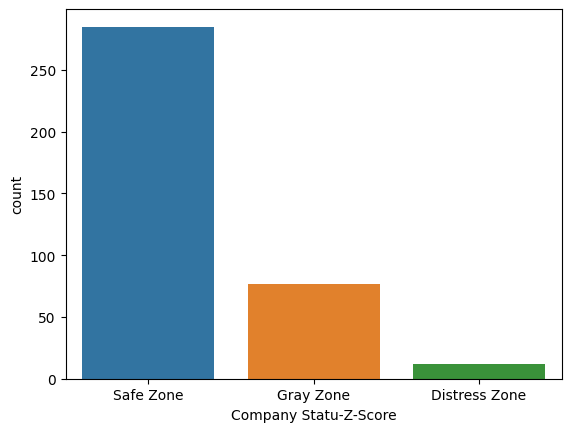

In [50]:
print(dframe['Company Statu-Z-Score'].value_counts())
sns.countplot(x=dframe['Company Statu-Z-Score'])

In [51]:
filtered_df = dframe[dframe['Company Statu-Z-Score'] == 'Distress Zone']
grouped = filtered_df.groupby('Company Name')['Year'].agg(list).reset_index()
grouped.rename(columns={'Year': 'Years'}, inplace=True)
print(grouped)

  Company Name                     Years
0          GSK        [2018, 2017, 2016]
1          PFE              [2010, 2009]
2         PRGO  [2019, 2018, 2016, 2005]
3          RDY        [2009, 2008, 2006]


In [52]:
df_z1score = dframe.groupby('Company Statu-Z1-Score')['Z1-Score'].agg(
    [('Z1 Value Count', 'count'),
     ('Z1 Mean', 'mean'),
     ('Z1 Std', 'std'),
     ('Z1 Maximum', 'max'),
     ('Z1 Minimum', 'min')]
).reset_index()

df_z1score

,Company Statu-Z1-Score,Z1 Value Count,Z1 Mean,Z1 Std,Z1 Maximum,Z1 Minimum
0,Distress Zone,15,0.89,0.39,1.21,-0.21
1,Gray Zone,195,2.16,0.43,2.89,1.24
2,Safe Zone,164,3.96,0.83,6.38,2.90


Company Statu-Z1-Score
Gray Zone        195
Safe Zone        164
Distress Zone     15
Name: count, dtype: int64


<Axes: xlabel='Company Statu-Z1-Score', ylabel='count'>

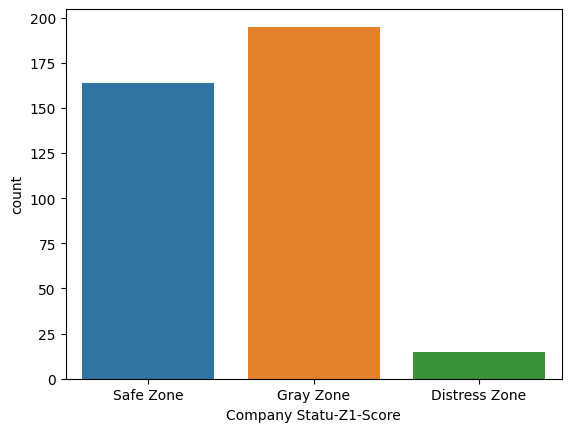

In [53]:
print(dframe['Company Statu-Z1-Score'].value_counts())
sns.countplot(x=dframe['Company Statu-Z1-Score'])

In [54]:
filtered_df = dframe[dframe['Company Statu-Z1-Score'] == 'Distress Zone']
grouped = filtered_df.groupby('Company Name')['Year'].agg(list).reset_index()
grouped.rename(columns={'Year': 'Years'}, inplace=True)
print(grouped)

  Company Name                                 Years
0          GSK  [2019, 2018, 2017, 2016, 2015, 2014]
1          LLY                          [2019, 2008]
2          PFE                                [2009]
3         PRGO        [2019, 2018, 2017, 2016, 2005]
4          RDY                                [2006]


In [55]:
df_z2score = dframe.groupby('Company Statu-Z2-Score')['Z2-Score'].agg(
    [('Z2 Value Count', 'count'),
     ('Z2 Mean', 'mean'),
     ('Z2 Std', 'std'),
     ('Z2 Maximum', 'max'),
     ('Z2 Minimum', 'min')]
).reset_index()

df_z2score

,Company Statu-Z2-Score,Z2 Value Count,Z2 Mean,Z2 Std,Z2 Maximum,Z2 Minimum
0,Distress Zone,12,0.29,0.85,0.99,-1.99
1,Gray Zone,25,1.96,0.50,2.58,1.10
2,Safe Zone,337,6.55,2.15,12.63,2.65


Company Statu-Z2-Score
Safe Zone        337
Gray Zone         25
Distress Zone     12
Name: count, dtype: int64


<Axes: xlabel='Company Statu-Z2-Score', ylabel='count'>

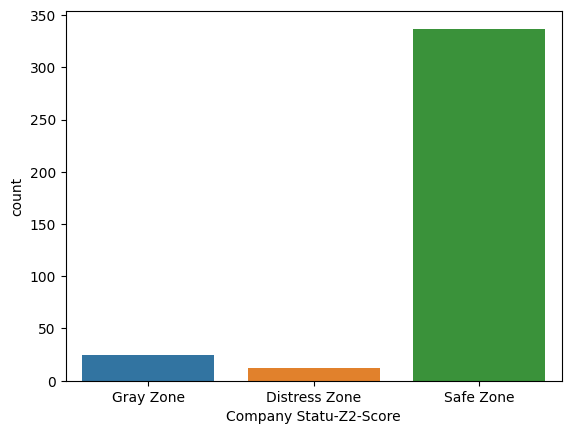

In [56]:
print(dframe['Company Statu-Z2-Score'].value_counts())
sns.countplot(x=dframe['Company Statu-Z2-Score'])

In [57]:
filtered_df = dframe[dframe['Company Statu-Z2-Score'] == 'Distress Zone']
grouped = filtered_df.groupby('Company Name')['Year'].agg(list).reset_index()
grouped.rename(columns={'Year': 'Years'}, inplace=True)
print(grouped)

  Company Name                                             Years
0          ABC  [2017, 2016, 2015, 1999, 1998, 1997, 1996, 1995]
1          GSK                                [2018, 2017, 2016]
2         PRGO                                            [2016]


# T Test 5 Variable by the Z Score Model

In [58]:
import numpy as np
import pandas as pd
from scipy import stats

bankrupt_group = []
non_bankrupt_group = []
bankrupt_F_1 = []
non_bankrupt_F_1 = []
bankrupt_F_2 = []
non_bankrupt_F_2 = []
bankrupt_F_3 = []
non_bankrupt_F_3 = []
bankrupt_F_4 = []
non_bankrupt_F_4 = []
bankrupt_F_5 = []
non_bankrupt_F_5 = []

for i, row in dframe.iterrows():
    z_score = row['Z-Score']
    f_1 = row['F_1']
    f_2 = row['F_2']
    f_3 = row['F_3']
    f_4 = row['F_4']
    f_5 = row['F_5']
    
    if z_score >= 1.8:
        bankrupt_group.append(z_score)
        bankrupt_F_1.append(float(f_1))
        bankrupt_F_2.append(float(f_2))
        bankrupt_F_3.append(float(f_3))
        bankrupt_F_4.append(float(f_4))
        bankrupt_F_5.append(float(f_5))
    else:
        non_bankrupt_group.append(z_score)
        non_bankrupt_F_1.append(float(f_1))
        non_bankrupt_F_2.append(float(f_2))
        non_bankrupt_F_3.append(float(f_3))
        non_bankrupt_F_4.append(float(f_4))
        non_bankrupt_F_5.append(float(f_5))

# Calculate the mean for each group
mean_bankrupt = np.mean(bankrupt_group)
mean_non_bankrupt = np.mean(non_bankrupt_group)
mean_bankrupt_F_1 = np.mean(bankrupt_F_1)
mean_non_bankrupt_F_1 = np.mean(non_bankrupt_F_1)
mean_bankrupt_F_2 = np.mean(bankrupt_F_2)
mean_non_bankrupt_F_2 = np.mean(non_bankrupt_F_2)
mean_bankrupt_F_3 = np.mean(bankrupt_F_3)
mean_non_bankrupt_F_3 = np.mean(non_bankrupt_F_3)
mean_bankrupt_F_4 = np.mean(bankrupt_F_4)
mean_non_bankrupt_F_4 = np.mean(non_bankrupt_F_4)
mean_bankrupt_F_5 = np.mean(bankrupt_F_5)
mean_non_bankrupt_F_5 = np.mean(non_bankrupt_F_5)

# Calculate the standard deviation for each group
std_dev_bankrupt = np.std(bankrupt_group, ddof=1)
std_dev_non_bankrupt = np.std(non_bankrupt_group, ddof=1)  # ddof=1 for sample standard deviation
std_dev_bankrupt_F_1 = np.std(bankrupt_F_1, ddof=1)
std_dev_non_bankrupt_F_1 = np.std(non_bankrupt_F_1, ddof=1)
std_dev_bankrupt_F_2 = np.std(bankrupt_F_2, ddof=1)
std_dev_non_bankrupt_F_2 = np.std(non_bankrupt_F_2, ddof=1)
std_dev_bankrupt_F_3 = np.std(bankrupt_F_3, ddof=1)
std_dev_non_bankrupt_F_3 = np.std(non_bankrupt_F_3, ddof=1)
std_dev_bankrupt_F_4 = np.std(bankrupt_F_4, ddof=1)
std_dev_non_bankrupt_F_4 = np.std(non_bankrupt_F_4, ddof=1)
std_dev_bankrupt_F_5 = np.std(bankrupt_F_5, ddof=1)
std_dev_non_bankrupt_F_5 = np.std(non_bankrupt_F_5, ddof=1)

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(bankrupt_group, non_bankrupt_group)
t_statistic_F_1, p_value_F_1 = stats.ttest_ind(bankrupt_F_1,non_bankrupt_F_1)
t_statistic_F_2, p_value_F_2 = stats.ttest_ind(bankrupt_F_2,non_bankrupt_F_2)
t_statistic_F_3, p_value_F_3 = stats.ttest_ind(bankrupt_F_3,non_bankrupt_F_3)
t_statistic_F_4, p_value_F_4 = stats.ttest_ind(bankrupt_F_4,non_bankrupt_F_4)
t_statistic_F_5, p_value_F_5 = stats.ttest_ind(bankrupt_F_5,non_bankrupt_F_5)

results = {
    'Altman variables': ['Liquidity ratio(F_1)', 'Profitability ratio(F_2)', 'Efficiency ratio(F_3)','Market Value ratio(F_4)','Efficiency ratio(F_5)'],
    'Bankrupt' : [len(bankrupt_group),len(bankrupt_group),len(bankrupt_group),len(bankrupt_group),len(bankrupt_group)],
    'Mean-Bankrupt': [mean_bankrupt_F_1, mean_bankrupt_F_2, mean_bankrupt_F_3,mean_bankrupt_F_4,mean_bankrupt_F_5],
    'Standard Deviation-Bankrupt': [std_dev_bankrupt_F_1, std_dev_bankrupt_F_2, std_dev_bankrupt_F_3,std_dev_bankrupt_F_4,std_dev_bankrupt_F_5],
    
    'NonBankrupt' : [len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group)],
    'Mean-NonBankrupt': [mean_non_bankrupt_F_1, mean_non_bankrupt_F_2, mean_non_bankrupt_F_3,mean_non_bankrupt_F_4,mean_non_bankrupt_F_5],
    'Standard Deviation-NonBankrupt': [std_dev_non_bankrupt_F_1, std_dev_non_bankrupt_F_2, std_dev_non_bankrupt_F_3,std_dev_non_bankrupt_F_4,std_dev_non_bankrupt_F_5],
    
    
    'T-Statistic': [t_statistic_F_1, t_statistic_F_2,t_statistic_F_3,t_statistic_F_4,t_statistic_F_5],
    'P-Value': [p_value_F_1, p_value_F_2,p_value_F_3,p_value_F_4,p_value_F_5]
    
}

# Create a DataFrame from the results dictionary
result_df_Zscore1 = pd.DataFrame(results)

alpha = 0.05
result_df_Zscore1['Result'] = result_df_Zscore1['P-Value'].apply(lambda p_value: "Reject the null hypothesis: There is a significant difference in Z-Scores." if p_value < alpha else "Fail to reject the null hypothesis: There is no significant difference in Z-Scores.")


# Display the result table
result_df_Zscore1

,Altman variables,Bankrupt,Mean-Bankrupt,Standard Deviation-Bankrupt,NonBankrupt,Mean-NonBankrupt,Standard Deviation-NonBankrupt,T-Statistic,P-Value,Result
0,Liquidity ratio(F_1),362,0.44,0.16,12,0.36,0.18,1.87,0.06,Fail to reject the null hypothesis: There is n...
1,Profitability ratio(F_2),362,0.40,0.22,12,0.03,0.17,5.79,0.00,Reject the null hypothesis: There is a signifi...
2,Efficiency ratio(F_3),362,0.14,0.09,12,-0.02,0.13,5.70,0.00,Reject the null hypothesis: There is a signifi...
3,Market Value ratio(F_4),362,2.01,1.98,12,0.77,0.51,2.17,0.03,Reject the null hypothesis: There is a signifi...
4,Efficiency ratio(F_5),362,1.49,1.42,12,0.48,0.15,2.46,0.01,Reject the null hypothesis: There is a signifi...


# T Test 5 Variable by the Z1 Score Model

In [59]:
import numpy as np
import pandas as pd
from scipy import stats

bankrupt_group = []
non_bankrupt_group = []
bankrupt_F_1 = []
non_bankrupt_F_1 = []
bankrupt_F_2 = []
non_bankrupt_F_2 = []
bankrupt_F_3 = []
non_bankrupt_F_3 = []
bankrupt_F_6 = []
non_bankrupt_F_6 = []
bankrupt_F_5 = []
non_bankrupt_F_5 = []

for i, row in dframe.iterrows():
    z_score = row['Z1-Score']
    f_1 = row['F_1']
    f_2 = row['F_2']
    f_3 = row['F_3']
    f_6 = row['F_6']
    f_5 = row['F_5']
    
    if z_score >= 1.23:
        bankrupt_group.append(z_score)
        bankrupt_F_1.append(float(f_1))
        bankrupt_F_2.append(float(f_2))
        bankrupt_F_3.append(float(f_3))
        bankrupt_F_6.append(float(f_6))
        bankrupt_F_5.append(float(f_5))
    else:
        non_bankrupt_group.append(z_score)
        non_bankrupt_F_1.append(float(f_1))
        non_bankrupt_F_2.append(float(f_2))
        non_bankrupt_F_3.append(float(f_3))
        non_bankrupt_F_6.append(float(f_6))
        non_bankrupt_F_5.append(float(f_5))

# Calculate the mean for each group
mean_bankrupt = np.mean(bankrupt_group)
mean_non_bankrupt = np.mean(non_bankrupt_group)
mean_bankrupt_F_1 = np.mean(bankrupt_F_1)
mean_non_bankrupt_F_1 = np.mean(non_bankrupt_F_1)
mean_bankrupt_F_2 = np.mean(bankrupt_F_2)
mean_non_bankrupt_F_2 = np.mean(non_bankrupt_F_2)
mean_bankrupt_F_3 = np.mean(bankrupt_F_3)
mean_non_bankrupt_F_3 = np.mean(non_bankrupt_F_3)
mean_bankrupt_F_6 = np.mean(bankrupt_F_6)
mean_non_bankrupt_F_6 = np.mean(non_bankrupt_F_6)
mean_bankrupt_F_5 = np.mean(bankrupt_F_5)
mean_non_bankrupt_F_5 = np.mean(non_bankrupt_F_5)

# Calculate the standard deviation for each group
std_dev_bankrupt = np.std(bankrupt_group, ddof=1)
std_dev_non_bankrupt = np.std(non_bankrupt_group, ddof=1)  # ddof=1 for sample standard deviation
std_dev_bankrupt_F_1 = np.std(bankrupt_F_1, ddof=1)
std_dev_non_bankrupt_F_1 = np.std(non_bankrupt_F_1, ddof=1)
std_dev_bankrupt_F_2 = np.std(bankrupt_F_2, ddof=1)
std_dev_non_bankrupt_F_2 = np.std(non_bankrupt_F_2, ddof=1)
std_dev_bankrupt_F_3 = np.std(bankrupt_F_3, ddof=1)
std_dev_non_bankrupt_F_3 = np.std(non_bankrupt_F_3, ddof=1)
std_dev_bankrupt_F_6 = np.std(bankrupt_F_6, ddof=1)
std_dev_non_bankrupt_F_6 = np.std(non_bankrupt_F_6, ddof=1)
std_dev_bankrupt_F_5 = np.std(bankrupt_F_5, ddof=1)
std_dev_non_bankrupt_F_5 = np.std(non_bankrupt_F_5, ddof=1)

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(bankrupt_group, non_bankrupt_group)
t_statistic_F_1, p_value_F_1 = stats.ttest_ind(bankrupt_F_1,non_bankrupt_F_1)
t_statistic_F_2, p_value_F_2 = stats.ttest_ind(bankrupt_F_2,non_bankrupt_F_2)
t_statistic_F_3, p_value_F_3 = stats.ttest_ind(bankrupt_F_3,non_bankrupt_F_3)
t_statistic_F_6, p_value_F_6 = stats.ttest_ind(bankrupt_F_6,non_bankrupt_F_6)
t_statistic_F_5, p_value_F_5 = stats.ttest_ind(bankrupt_F_5,non_bankrupt_F_5)

results = {
    'Altman variables': ['Liquidity ratio(F_1)', 'Profitability ratio(F_2)', 'Efficiency ratio(F_3)','Net Worth ratio(F_6)','Efficiency ratio(F_5)'],
    'Bankrupt' : [len(bankrupt_group),len(bankrupt_group),len(bankrupt_group),len(bankrupt_group),len(bankrupt_group)],
    'Mean-Bankrupt': [mean_bankrupt_F_1, mean_bankrupt_F_2, mean_bankrupt_F_3,mean_bankrupt_F_6,mean_bankrupt_F_5],
    'Standard Deviation-Bankrupt': [std_dev_bankrupt_F_1, std_dev_bankrupt_F_2, std_dev_bankrupt_F_3,std_dev_bankrupt_F_6,std_dev_bankrupt_F_5],
    
    'NonBankrupt' : [len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group)],
    'Mean-NonBankrupt': [mean_non_bankrupt_F_1, mean_non_bankrupt_F_2, mean_non_bankrupt_F_3,mean_non_bankrupt_F_6,mean_non_bankrupt_F_5],
    'Standard Deviation-NonBankrupt': [std_dev_non_bankrupt_F_1, std_dev_non_bankrupt_F_2, std_dev_non_bankrupt_F_3,std_dev_non_bankrupt_F_6,std_dev_non_bankrupt_F_5],
    
    
    'T-Statistic': [t_statistic_F_1, t_statistic_F_2,t_statistic_F_3,t_statistic_F_6,t_statistic_F_5],
    'P-Value': [p_value_F_1, p_value_F_2,p_value_F_3,p_value_F_6,p_value_F_5]
    
}

# Create a DataFrame from the results dictionary
result_df_Zscore1 = pd.DataFrame(results)

alpha = 0.05
result_df_Zscore1['Result'] = result_df_Zscore1['P-Value'].apply(lambda p_value: "Reject the null hypothesis: There is a significant difference in Z-Scores." if p_value < alpha else "Fail to reject the null hypothesis: There is no significant difference in Z-Scores.")


# Display the result table
result_df_Zscore1

,Altman variables,Bankrupt,Mean-Bankrupt,Standard Deviation-Bankrupt,NonBankrupt,Mean-NonBankrupt,Standard Deviation-NonBankrupt,T-Statistic,P-Value,Result
0,Liquidity ratio(F_1),359,0.45,0.16,15,0.27,0.18,4.16,0.00,Reject the null hypothesis: There is a signifi...
1,Profitability ratio(F_2),359,0.41,0.21,15,-0.01,0.14,7.45,0.00,Reject the null hypothesis: There is a signifi...
2,Efficiency ratio(F_3),359,0.14,0.09,15,0.01,0.13,4.99,0.00,Reject the null hypothesis: There is a signifi...
3,Net Worth ratio(F_6),359,0.97,0.64,15,0.44,0.41,3.15,0.00,Reject the null hypothesis: There is a signifi...
4,Efficiency ratio(F_5),359,1.49,1.42,15,0.47,0.11,2.78,0.01,Reject the null hypothesis: There is a signifi...


# T Test 5 Variable by the Z2 Score Model

In [60]:
import numpy as np
import pandas as pd
from scipy import stats

bankrupt_group = []
non_bankrupt_group = []
bankrupt_F_1 = []
non_bankrupt_F_1 = []
bankrupt_F_2 = []
non_bankrupt_F_2 = []
bankrupt_F_3 = []
non_bankrupt_F_3 = []
bankrupt_F_6 = []
non_bankrupt_F_6 = []
bankrupt_F_5 = []
non_bankrupt_F_5 = []

for i, row in dframe.iterrows():
    z_score = row['Z2-Score']
    f_1 = row['F_1']
    f_2 = row['F_2']
    f_3 = row['F_3']
    f_6 = row['F_6']
    
    if z_score >= 1.1:
        bankrupt_group.append(z_score)
        bankrupt_F_1.append(float(f_1))
        bankrupt_F_2.append(float(f_2))
        bankrupt_F_3.append(float(f_3))
        bankrupt_F_6.append(float(f_6))
    else:
        non_bankrupt_group.append(z_score)
        non_bankrupt_F_1.append(float(f_1))
        non_bankrupt_F_2.append(float(f_2))
        non_bankrupt_F_3.append(float(f_3))
        non_bankrupt_F_6.append(float(f_6))

# Calculate the mean for each group
mean_bankrupt = np.mean(bankrupt_group)
mean_non_bankrupt = np.mean(non_bankrupt_group)
mean_bankrupt_F_1 = np.mean(bankrupt_F_1)
mean_non_bankrupt_F_1 = np.mean(non_bankrupt_F_1)
mean_bankrupt_F_2 = np.mean(bankrupt_F_2)
mean_non_bankrupt_F_2 = np.mean(non_bankrupt_F_2)
mean_bankrupt_F_3 = np.mean(bankrupt_F_3)
mean_non_bankrupt_F_3 = np.mean(non_bankrupt_F_3)
mean_bankrupt_F_6 = np.mean(bankrupt_F_6)
mean_non_bankrupt_F_6 = np.mean(non_bankrupt_F_6)

# Calculate the standard deviation for each group
std_dev_bankrupt = np.std(bankrupt_group, ddof=1)
std_dev_non_bankrupt = np.std(non_bankrupt_group, ddof=1)  # ddof=1 for sample standard deviation
std_dev_bankrupt_F_1 = np.std(bankrupt_F_1, ddof=1)
std_dev_non_bankrupt_F_1 = np.std(non_bankrupt_F_1, ddof=1)
std_dev_bankrupt_F_2 = np.std(bankrupt_F_2, ddof=1)
std_dev_non_bankrupt_F_2 = np.std(non_bankrupt_F_2, ddof=1)
std_dev_bankrupt_F_3 = np.std(bankrupt_F_3, ddof=1)
std_dev_non_bankrupt_F_3 = np.std(non_bankrupt_F_3, ddof=1)
std_dev_bankrupt_F_6 = np.std(bankrupt_F_6, ddof=1)
std_dev_non_bankrupt_F_6 = np.std(non_bankrupt_F_6, ddof=1)

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(bankrupt_group, non_bankrupt_group)
t_statistic_F_1, p_value_F_1 = stats.ttest_ind(bankrupt_F_1,non_bankrupt_F_1)
t_statistic_F_2, p_value_F_2 = stats.ttest_ind(bankrupt_F_2,non_bankrupt_F_2)
t_statistic_F_3, p_value_F_3 = stats.ttest_ind(bankrupt_F_3,non_bankrupt_F_3)
t_statistic_F_6, p_value_F_6 = stats.ttest_ind(bankrupt_F_6,non_bankrupt_F_6)

results = {
    'Altman variables': ['Liquidity ratio(F_1)', 'Profitability ratio(F_2)', 'Efficiency ratio(F_3)','Net Worth ratio(F_6)'],
    'Bankrupt' : [len(bankrupt_group),len(bankrupt_group),len(bankrupt_group),len(bankrupt_group)],
    'Mean-Bankrupt': [mean_bankrupt_F_1, mean_bankrupt_F_2, mean_bankrupt_F_3,mean_bankrupt_F_6],
    'Standard Deviation-Bankrupt': [std_dev_bankrupt_F_1, std_dev_bankrupt_F_2, std_dev_bankrupt_F_3,std_dev_bankrupt_F_6],
    
    'NonBankrupt' : [len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group),len(non_bankrupt_group)],
    'Mean-NonBankrupt': [mean_non_bankrupt_F_1, mean_non_bankrupt_F_2, mean_non_bankrupt_F_3,mean_non_bankrupt_F_6],
    'Standard Deviation-NonBankrupt': [std_dev_non_bankrupt_F_1, std_dev_non_bankrupt_F_2, std_dev_non_bankrupt_F_3,std_dev_non_bankrupt_F_6],
    
    
    'T-Statistic': [t_statistic_F_1, t_statistic_F_2,t_statistic_F_3,t_statistic_F_6],
    'P-Value': [p_value_F_1, p_value_F_2,p_value_F_3,p_value_F_6]
    
}

result_df_Zscore2 = pd.DataFrame(results)

alpha = 0.05
result_df_Zscore2['Result'] = result_df_Zscore2['P-Value'].apply(lambda p_value: "Reject the null hypothesis: There is a significant difference in Z-Scores." if p_value < alpha else "Fail to reject the null hypothesis: There is no significant difference in Z-Scores.")

result_df_Zscore2

,Altman variables,Bankrupt,Mean-Bankrupt,Standard Deviation-Bankrupt,NonBankrupt,Mean-NonBankrupt,Standard Deviation-NonBankrupt,T-Statistic,P-Value,Result
0,Liquidity ratio(F_1),362,0.45,0.15,12,0.06,0.13,9.09,0.00,Reject the null hypothesis: There is a signifi...
1,Profitability ratio(F_2),362,0.41,0.21,12,-0.09,0.12,8.05,0.00,Reject the null hypothesis: There is a signifi...
2,Efficiency ratio(F_3),362,0.13,0.09,12,0.01,0.12,4.43,0.00,Reject the null hypothesis: There is a signifi...
3,Net Worth ratio(F_6),362,0.98,0.63,12,0.08,0.22,4.90,0.00,Reject the null hypothesis: There is a signifi...


# K-Means clustering for the Modified Altman Z-Score 

In [61]:
from sklearn.cluster import KMeans

X=dframe['Z-Score'].values.reshape(-1, 1)

k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
dframe['K-means clustering(Z-Score)'] = kmeans.fit_predict(X)

cluster_centroids = kmeans.cluster_centers_

sorted_centroids = np.sort(cluster_centroids.flatten())

cut_points = {
    'Distress': sorted_centroids[0],
    'Gray': sorted_centroids[1],
    'Safe': sorted_centroids[2]
}

def classify_financial_health(z_score):
    if z_score <= cut_points['Distress']:
        return 'Distress'
    elif cut_points['Distress'] < z_score <= cut_points['Gray']:
        return 'Gray'
    else:
        return 'Safe'

dframe['Company Statu-K-Mean(Z-Score)'] = dframe['Z-Score'].apply(classify_financial_health)

print(dframe[['Company Name', 'Z-Score', 'K-means clustering(Z-Score)', 'Company Statu-K-Mean(Z-Score)']])

    Company Name  Z-Score  K-means clustering(Z-Score)   
0            ABC     5.17                            0  \
1            ABC     5.04                            0   
2            ABC     4.89                            0   
3            ABC     4.94                            0   
4            ABC     5.43                            0   
..           ...      ...                          ...   
446          RDY     2.12                            2   
447          RDY     2.70                            2   
448          RDY     3.14                            2   
449          RDY     3.34                            2   
450          RDY     1.94                            2   

    Company Statu-K-Mean(Z-Score)  
0                            Safe  
1                            Safe  
2                            Safe  
3                            Safe  
4                            Safe  
..                            ...  
446                      Distress  
447            

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [62]:
df_kmeanzscore = dframe.groupby('Company Statu-K-Mean(Z-Score)')['Z-Score'].agg(
    [('Count', 'count'),
     ('Mean', 'mean'),
     ('Std', 'std'),
     ('Maximum', 'max'),
     ('Minimum', 'min')]
).reset_index()

df_kmeanzscore

,Company Statu-K-Mean(Z-Score),Count,Mean,Std,Maximum,Minimum
0,Distress,70,2.15,0.45,2.68,0.28
1,Gray,165,3.73,0.51,4.54,2.70
2,Safe,139,5.65,1.27,15.33,4.55


Company Statu-K-Mean(Z-Score)
Gray        165
Safe        139
Distress     70
Name: count, dtype: int64


<Axes: xlabel='Company Statu-K-Mean(Z-Score)', ylabel='count'>

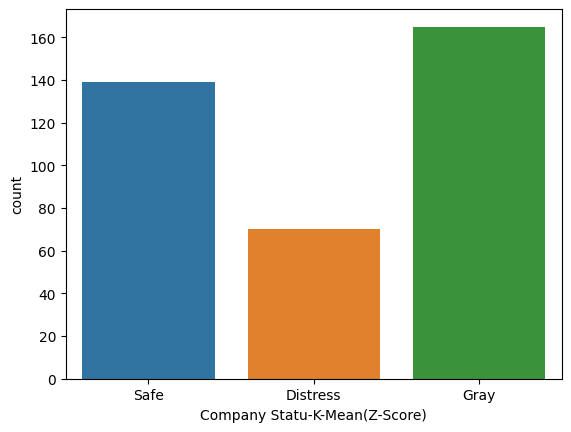

In [63]:
print(dframe['Company Statu-K-Mean(Z-Score)'].value_counts())
sns.countplot(x=dframe['Company Statu-K-Mean(Z-Score)'])

# K-Means clustering for the Modified Altman Z1-Score 

In [64]:
from sklearn.cluster import KMeans

X=dframe['Z1-Score'].values.reshape(-1, 1)

k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
dframe['K-means clustering(Z1-Score)'] = kmeans.fit_predict(X)

cluster_centroids = kmeans.cluster_centers_

sorted_centroids = np.sort(cluster_centroids.flatten())

cut_points = {
    'Distress': sorted_centroids[0],
    'Gray': sorted_centroids[1],
    'Safe': sorted_centroids[2]
}

def classify_financial_health(z_score):
    if z_score <= cut_points['Distress']:
        return 'Distress'
    elif cut_points['Distress'] < z_score <= cut_points['Gray']:
        return 'Gray'
    else:
        return 'Safe'

dframe['Company Statu-K-Mean(Z1-Score)'] = dframe['Z1-Score'].apply(classify_financial_health)

print(dframe[['Company Name', 'Z1-Score', 'K-means clustering(Z1-Score)', 'Company Statu-K-Mean(Z1-Score)']])

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Company Name  Z1-Score  K-means clustering(Z1-Score)   
0            ABC      4.83                             1  \
1            ABC      4.72                             1   
2            ABC      4.53                             1   
3            ABC      4.61                             1   
4            ABC      4.99                             1   
..           ...       ...                           ...   
446          RDY      2.53                             2   
447          RDY      3.53                             2   
448          RDY      4.06                             1   
449          RDY      4.36                             1   
450          RDY      1.89                             0   

    Company Statu-K-Mean(Z1-Score)  
0                             Safe  
1                             Safe  
2                             Safe  
3                             Safe  
4                             Safe  
..                             ...  
446                 

In [65]:
df_kmeanz1score = dframe.groupby('Company Statu-K-Mean(Z1-Score)')['Z1-Score'].agg(
    [('Count', 'count'),
     ('Mean', 'mean'),
     ('Std', 'std'),
     ('Maximum', 'max'),
     ('Minimum', 'min')]
).reset_index()

df_kmeanz1score

,Company Statu-K-Mean(Z1-Score),Count,Mean,Std,Maximum,Minimum
0,Distress,61,1.38,0.36,1.76,-0.21
1,Gray,155,2.37,0.30,2.93,1.77
2,Safe,158,4.00,0.82,6.38,2.95


Company Statu-K-Mean(Z1-Score)
Safe        158
Gray        155
Distress     61
Name: count, dtype: int64


<Axes: xlabel='Company Statu-K-Mean(Z1-Score)', ylabel='count'>

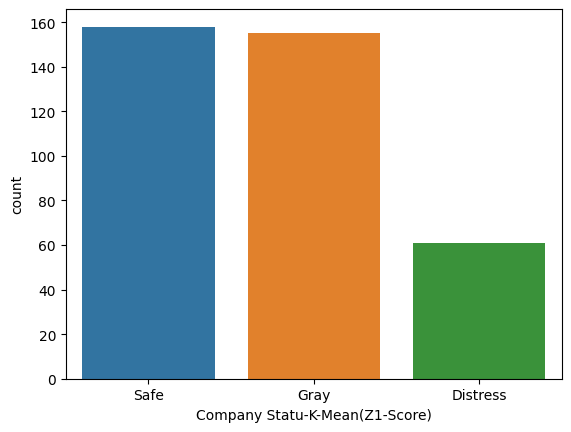

In [66]:
print(dframe['Company Statu-K-Mean(Z1-Score)'].value_counts())
sns.countplot(x=dframe['Company Statu-K-Mean(Z1-Score)'])

# K-Means clustering for the Modified Altman Z2-Score 

In [67]:
from sklearn.cluster import KMeans

X=dframe['Z2-Score'].values.reshape(-1, 1)

k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
dframe['K-means clustering(Z2-Score)'] = kmeans.fit_predict(X)

cluster_centroids = kmeans.cluster_centers_

sorted_centroids = np.sort(cluster_centroids.flatten())

cut_points = {
    'Distress': sorted_centroids[0],
    'Gray': sorted_centroids[1],
    'Safe': sorted_centroids[2]
}

def classify_financial_health(z_score):
    if z_score <= cut_points['Distress']:
        return 'Distress'
    elif cut_points['Distress'] < z_score <= cut_points['Gray']:
        return 'Gray'
    else:
        return 'Safe'

dframe['Company Statu-K-Mean(Z2-Score)'] = dframe['Z2-Score'].apply(classify_financial_health)

print(dframe[['Company Name', 'Z2-Score', 'K-means clustering(Z2-Score)', 'Company Statu-K-Mean(Z2-Score)']])

/anaconda/envs/azureml_py310_sdkv2/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Company Name Z2-Score  K-means clustering(Z2-Score)   
0            ABC     1.10                             1  \
1            ABC     1.15                             1   
2            ABC     0.84                             1   
3            ABC     0.99                             1   
4            ABC     0.38                             1   
..           ...      ...                           ...   
446          RDY     8.47                             2   
447          RDY    11.04                             2   
448          RDY    12.31                             2   
449          RDY    12.63                             2   
450          RDY     4.51                             0   

    Company Statu-K-Mean(Z2-Score)  
0                         Distress  
1                         Distress  
2                         Distress  
3                         Distress  
4                         Distress  
..                             ...  
446                           Sa

In [68]:
df_kmeanz2score = dframe.groupby('Company Statu-K-Mean(Z2-Score)')['Z2-Score'].agg(
    [('Count', 'count'),
     ('Mean', 'mean'),
     ('Std', 'std'),
     ('Maximum', 'max'),
     ('Minimum', 'min')]
).reset_index()

df_kmeanz2score

,Company Statu-K-Mean(Z2-Score),Count,Mean,Std,Maximum,Minimum
0,Distress,37,1.42,1.01,2.58,-1.99
1,Gray,130,4.31,1.02,5.88,2.65
2,Safe,207,7.96,1.32,12.63,5.88


Company Statu-K-Mean(Z2-Score)
Safe        207
Gray        130
Distress     37
Name: count, dtype: int64


<Axes: xlabel='Company Statu-K-Mean(Z2-Score)', ylabel='count'>

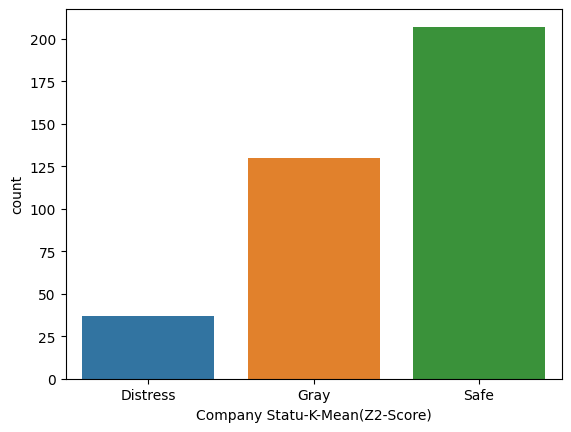

In [69]:
print(dframe['Company Statu-K-Mean(Z2-Score)'].value_counts())
sns.countplot(x=dframe['Company Statu-K-Mean(Z2-Score)'])

In [70]:
#'ABT', 'GSK', 'MRK', 'NVO?', 'PFE', 'PRGO', 'RDY' 
dframe[['Company Name','Year','Z2-Score','Company Statu-Z-Score','Company Statu-K-Mean(Z-Score)','Company Statu-Z1-Score','Company Statu-K-Mean(Z1-Score)','Company Statu-Z2-Score','Company Statu-K-Mean(Z2-Score)']][dframe['Company Statu-K-Mean(Z2-Score)']=='Distress']

,Company Name,Year,Z2-Score,Company Statu-Z-Score,Company Statu-K-Mean(Z-Score),Company Statu-Z1-Score,Company Statu-K-Mean(Z1-Score),Company Statu-Z2-Score,Company Statu-K-Mean(Z2-Score)
0,ABC,2019,1.10,Safe Zone,Safe,Safe Zone,Safe,Gray Zone,Distress
1,ABC,2018,1.15,Safe Zone,Safe,Safe Zone,Safe,Gray Zone,Distress
2,ABC,2017,0.84,Safe Zone,Safe,Safe Zone,Safe,Distress Zone,Distress
3,ABC,2016,0.99,Safe Zone,Safe,Safe Zone,Safe,Distress Zone,Distress
4,ABC,2015,0.38,Safe Zone,Safe,Safe Zone,Safe,Distress Zone,Distress
5,ABC,2014,1.15,Safe Zone,Safe,Safe Zone,Safe,Gray Zone,Distress
6,ABC,2013,1.50,Safe Zone,Safe,Safe Zone,Safe,Gray Zone,Distress
7,ABC,2012,2.02,Safe Zone,Safe,Safe Zone,Safe,Gray Zone,Distress
18,ABC,2001,2.38,Gray Zone,Distress,Gray Zone,Gray,Gray Zone,Distress
19,ABC,2000,1.33,Safe Zone,Safe,Safe Zone,Safe,Gray Zone,Distress


In [71]:
filtered_df = dframe[dframe['Company Statu-K-Mean(Z-Score)'] == 'Distress']
grouped = filtered_df.groupby('Company Name')['Year'].agg(list).reset_index()
grouped.rename(columns={'Year': 'Years'}, inplace=True)

for index, row in grouped.iterrows():
    print(row['Company Name'], row['Years'])


ABC [2001]
ABT [2017, 2012, 2011, 2010, 2006]
GSK [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]
LLY [2008, 1994]
MRK [2011, 2010, 2009]
NVO [1999, 1994, 1993, 1992, 1991, 1990, 1989, 1988, 1987, 1986, 1985]
PFE [2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2005, 2004, 2003]
PRGO [2019, 2018, 2017, 2016, 2015, 2006, 2005]
RDY [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2001]


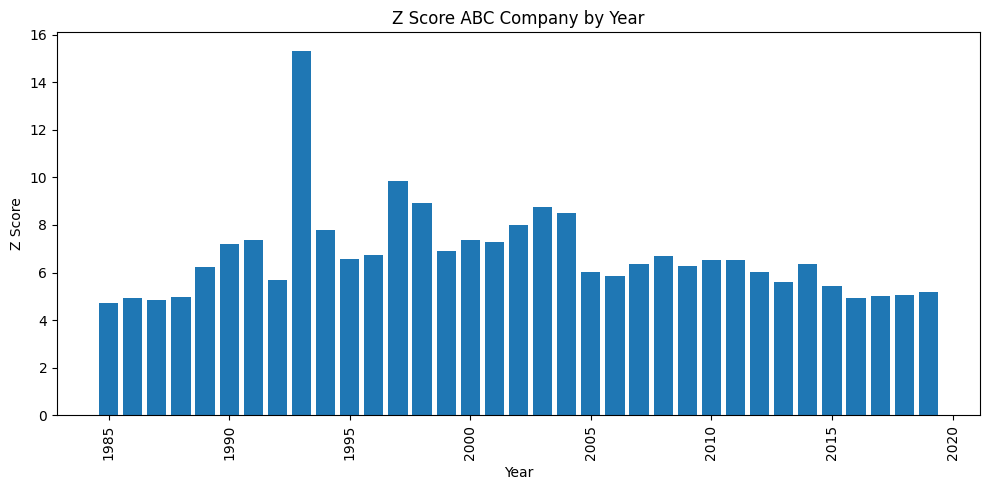

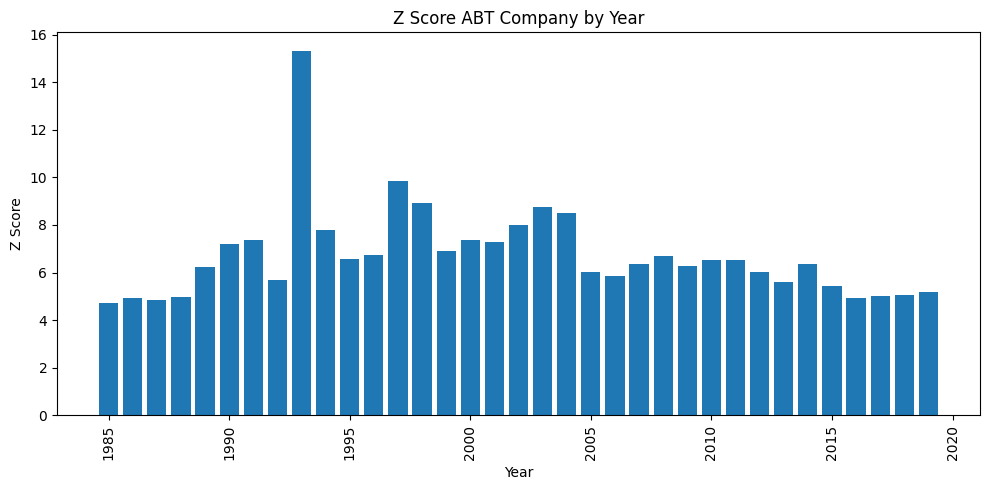

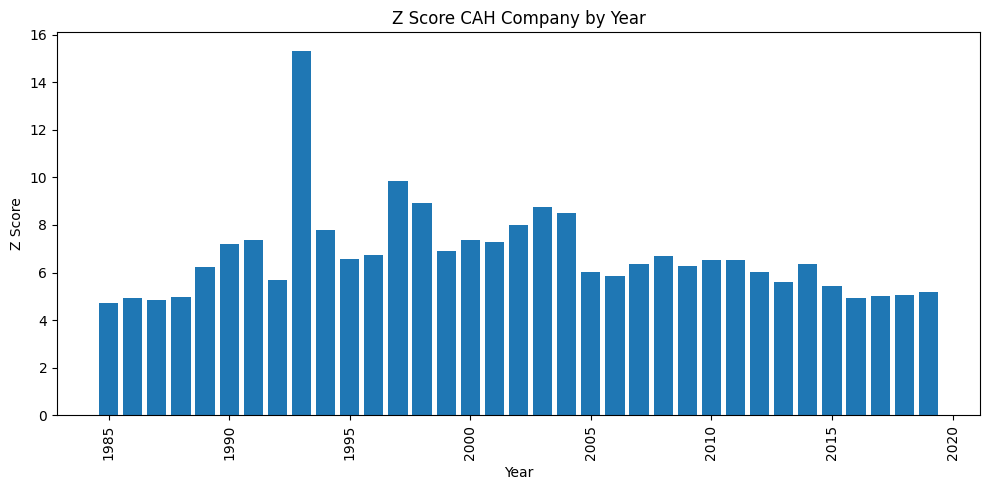

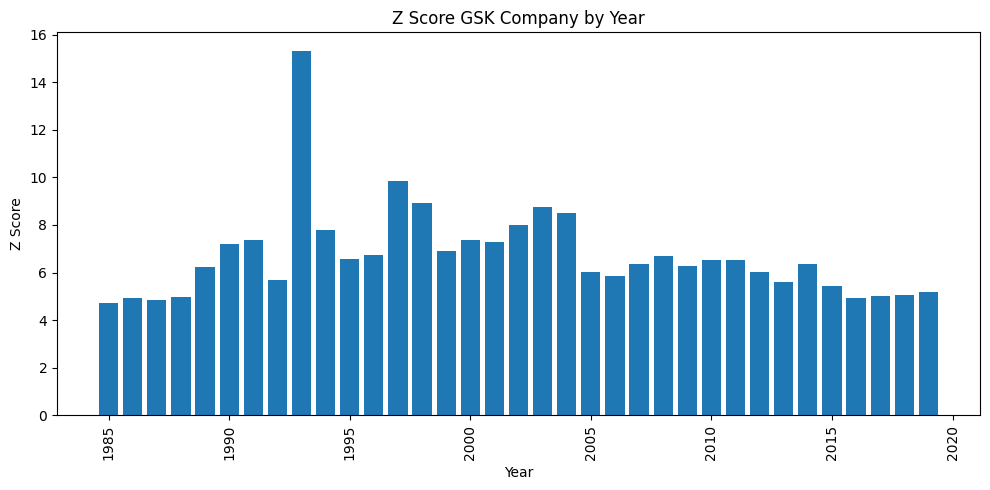

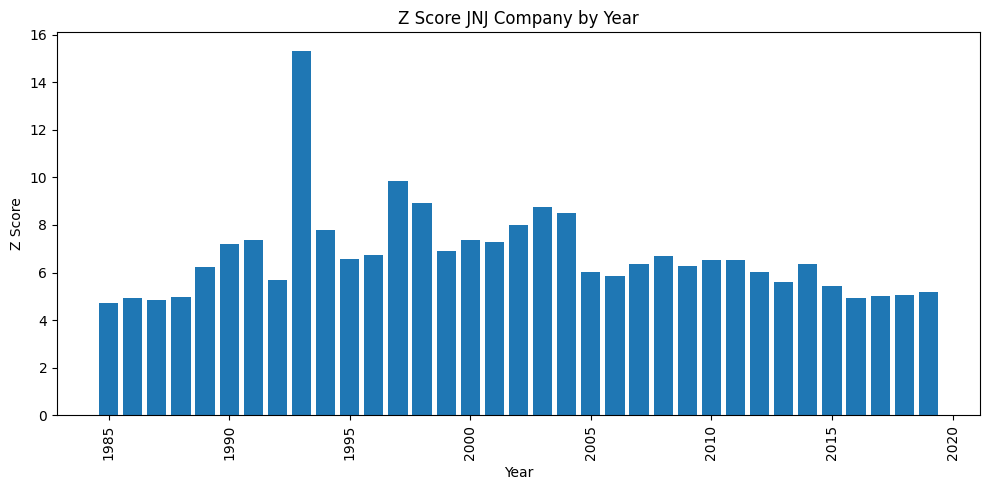

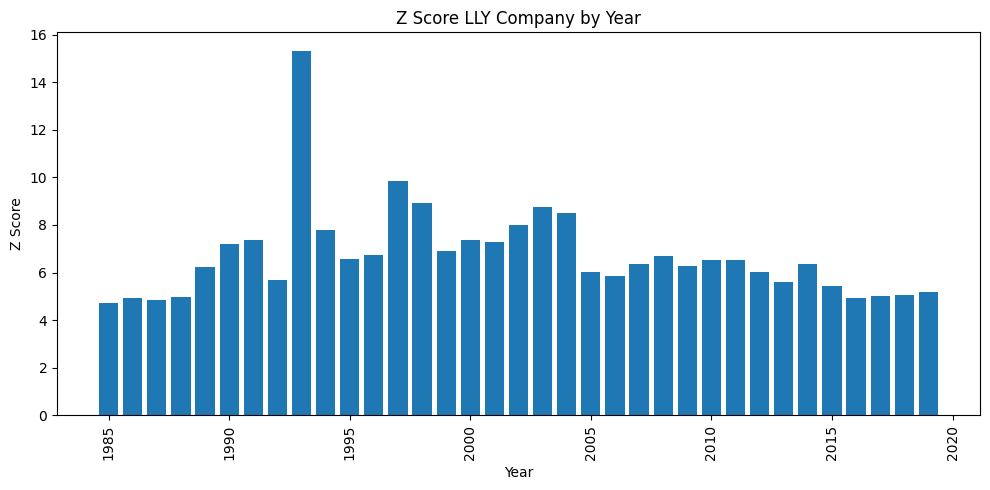

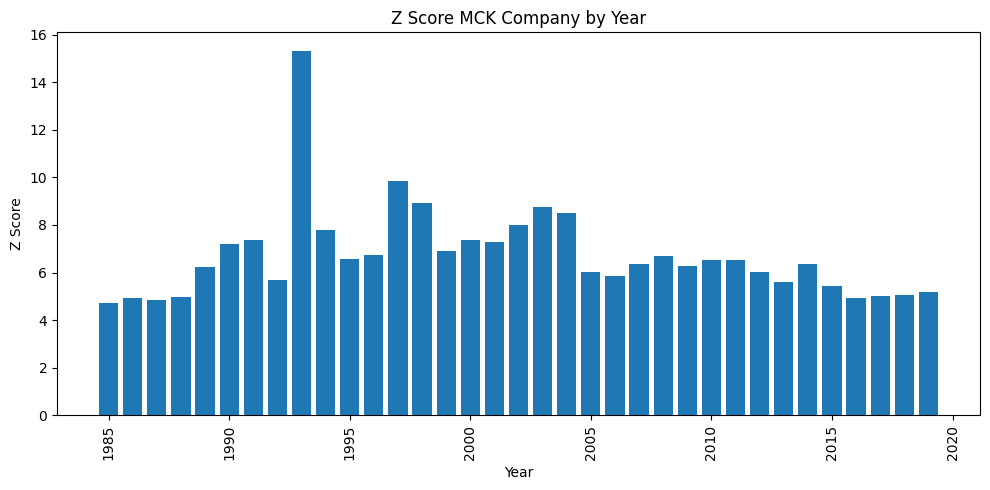

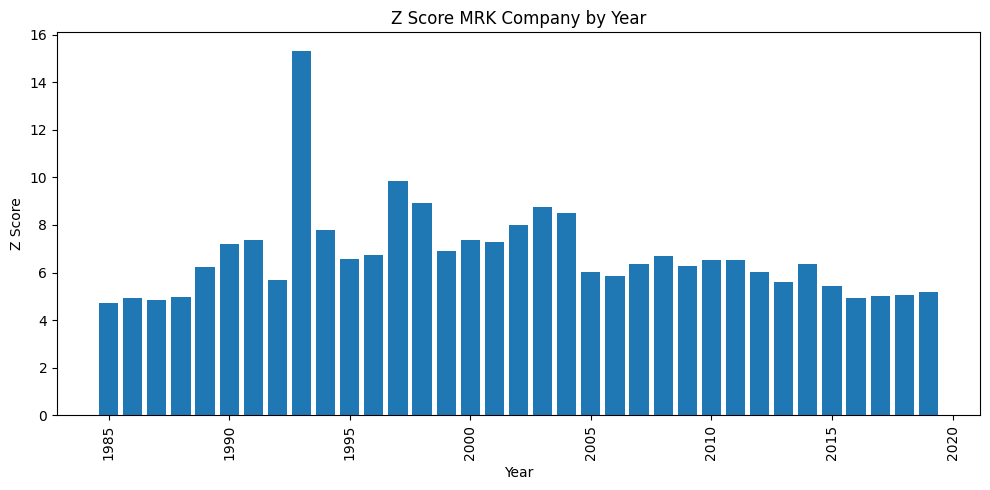

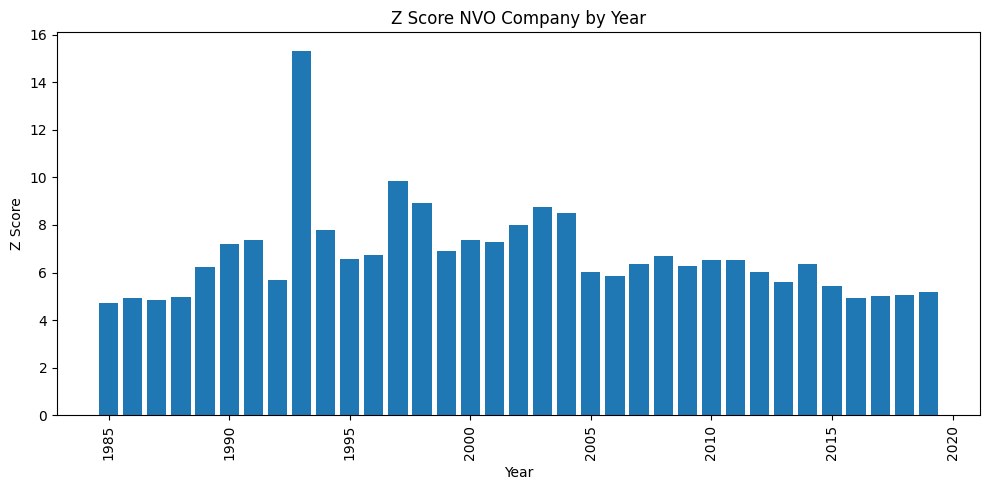

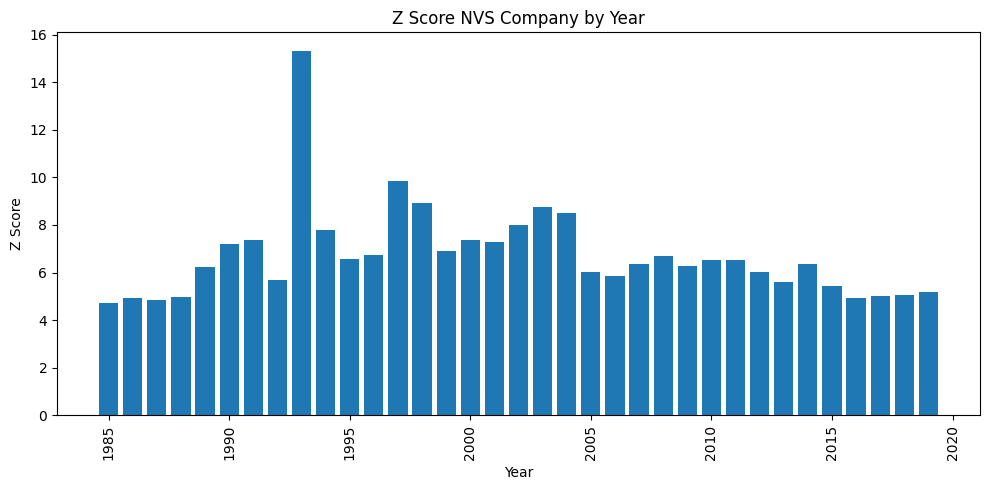

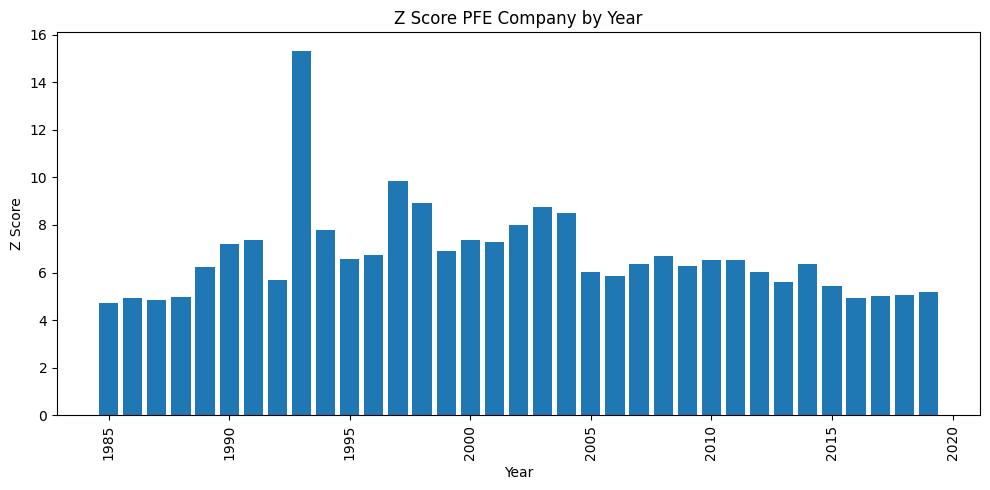

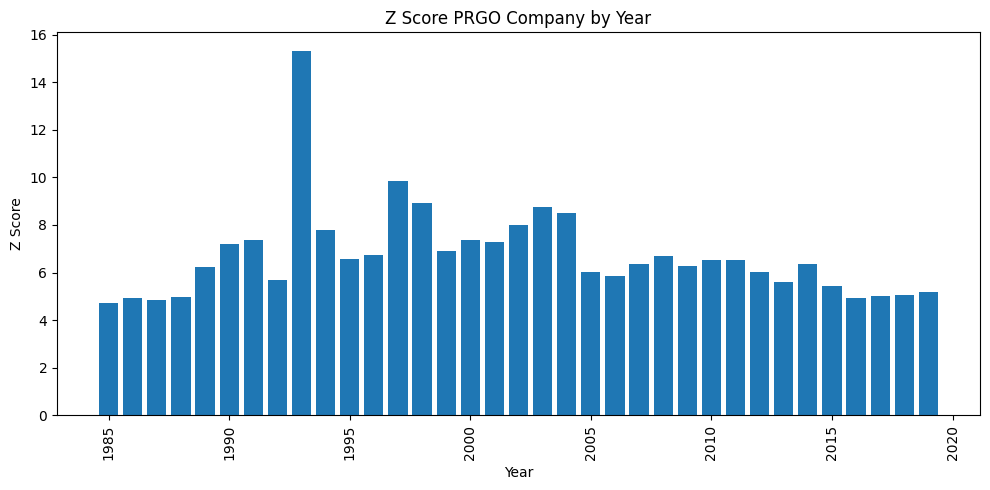

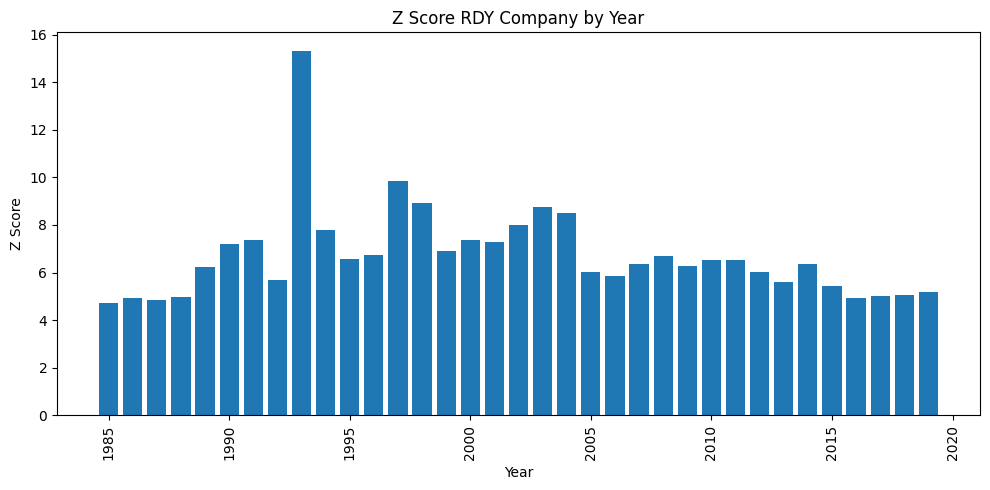

RDY not found in the DataFrame.


In [72]:
import matplotlib.pyplot as plt

for company in companies:
    Year=dframe['Year']
    Zscore=dframe['Z-Score']
    
    plt.figure(figsize=(10, 5))
    plt.bar(Year, Zscore)  
    plt.xlabel('Year')
    plt.ylabel('Z Score')
    plt.title(f'Z Score {company} Company by Year')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
       
else:
    print(f"{company} not found in the DataFrame.")